Bài toán Cauchy:

\begin{align*}
&Y = \begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}\\
&Y' = F(Y, t) = \begin{pmatrix}
f_1\\
f_2\\
\vdots\\
f_n
\end{pmatrix}\\
&Y(t_0) = Y_0
\end{align*}

Công thức hình thang

\begin{equation}
Y_{n+1} = Y_{n} + \dfrac{h}{2}\left[F(Y_n, t_n) + F(Y_{n+1}, t_{n+1})\right]
\end{equation}

Giải ông này bằng phương pháp lặp đơn với $h$ đủ nhỏ, xấp xỉ đầu tính bằng Euler hiện

Công thức Euler cải biên / AB1-AM1 (Lặp 1 phát thôi)

\begin{align*}
&Z_{n+1} = Y_{n} + hF(Y_{n}, t_{n})\\
&Y_{n+1} = Y_{n} + \dfrac{h}{2} \left[F(Y_{n}, t_n) + F(Z_{n+1}, t_{n+1})\right]
\end{align*}

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


Input: Thời điểm ban đầu $t_0$, bước lưới $h = d_t$, số lượng bước nhảy $N$, hàm $F(Y, t) = Y'$, điều kiện ban đầu $Y_0$

In [2]:
t_0 = 0
dt = 0.1
N = 10000

#y_0 và F(Y, t) phải có cùng số phần tử

# Điều kiện ban đầu
y_0 = np.array([5.2, 3.6])

# F(Y, t)
def F(y, t):
    ans = np.copy(y)
    #ans[0] = (t+2*y[0])/(t*t+2*y[0]*y[0])
    ans[0] = y[0]*(1-y[0]/45) - 0.5*y[0]*y[1]/(1+y[0]**2)
    ans[1] = y[0]*y[1] + 0.3*y[0]*y[1]/(1+y[0]**2)
    return ans



Số lượng xấp xỉ đầu và cuối muốn in ra

In [3]:
k = 3

Gói con giải bài toán Cauchy bằng Euler cải biên (thích giải bằng hình thang thì tự sửa code), Kết quả trả ra 2 mảng
$$[t_0, t_1, \dots, t_n]$$
$$[Y_0, Y_1, \dots, Y_n]$$

In [4]:
def Euler_Improve(y, t):
    vector_y = np.array([y])
    vector_t = np.array([t])
    T = t + dt*N
    n = 0
    while n < N:
        Z = vector_y[-1] + dt*F(vector_y[-1], vector_t[-1])
        vector_y = np.vstack((vector_y, vector_y[-1] 
                              + dt/2*(F(vector_y[-1], vector_t[-1])+F(Z, vector_t[-1]+dt))))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt
    
    return vector_y, vector_t

Lôi Euler cải biên ra vụt

In [5]:
ans_y, ans_t = Euler_Improve(y_0, t_0)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17584\2849557489.py:14: RuntimeWarning: overflow encountered in scalar multiply
  ans[0] = y[0]*(1-y[0]/45) - 0.5*y[0]*y[1]/(1+y[0]**2)
C:\Users\Hp\AppData\Local\Temp\ipykernel_17584\2849557489.py:15: RuntimeWarning: overflow encountered in scalar multiply
  ans[1] = y[0]*y[1] + 0.3*y[0]*y[1]/(1+y[0]**2)
C:\Users\Hp\AppData\Local\Temp\ipykernel_17584\2849557489.py:14: RuntimeWarning: invalid value encountered in scalar divide
  ans[0] = y[0]*(1-y[0]/45) - 0.5*y[0]*y[1]/(1+y[0]**2)
C:\Users\Hp\AppData\Local\Temp\ipykernel_17584\2849557489.py:15: RuntimeWarning: invalid value encountered in scalar divide
  ans[1] = y[0]*y[1] + 0.3*y[0]*y[1]/(1+y[0]**2)


In kết quả ra rồi chém vào bài

t =  0.1 :	 Y[ 1 ]^T =  [5.63576108 6.10526059]
t =  0.2 :	 Y[ 2 ]^T =  [ 6.0804248 10.7741989]
t =  0.3 :	 Y[ 3 ]^T =  [ 6.51390392 19.77970447]
...
t =  999.8 :	 Y[ 9998 ]^T =  [nan nan]
t =  999.9 :	 Y[ 9999 ]^T =  [nan nan]
t =  1000.0 :	 Y[ 10000 ]^T =  [nan nan]


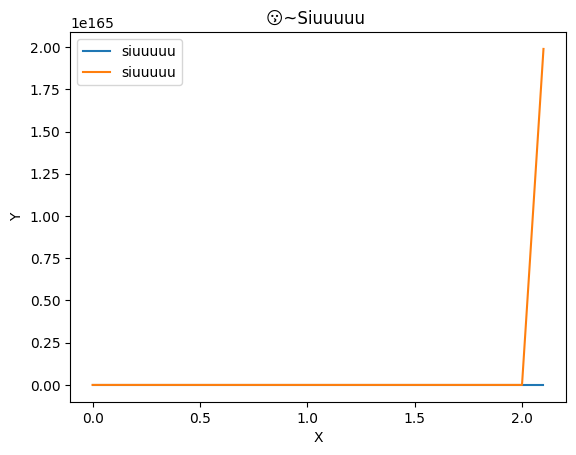

In [6]:
for i in range(k):
    print("t = ", round(ans_t[i+1], 3), ":\t Y[", i+1, "]^T = " , ans_y[i+1])

print("...")

for i in range(k):
    print("t = ", round(ans_t[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y[-k+i])

# Vẽ đồ thị
ans_y = np.transpose(ans_y)

# Muốn vẽ gì thì sửa ở đây
#plt.plot(ans_t, ans_y[0] - np.exp(-1*ans_t), label = 'Sai số') # Vẽ y_0 theo t
plt.plot(ans_t, ans_y[0], label = 'siuuuuu') # Vẽ y_1 theo t
plt.plot(ans_t, ans_y[1], label = 'siuuuuu')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()

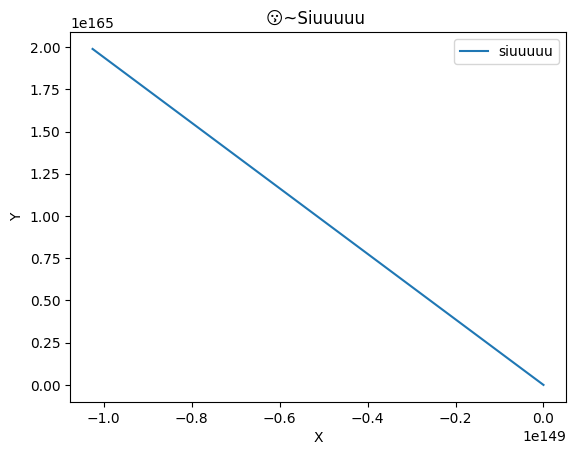

In [7]:
plt.plot(ans_y[0], ans_y[1], label = 'siuuuuu') # Vẽ y_1 theo t

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()